# 1.2 Assignment – NLP EDA

The objective of this assignment looks at basic text cleaning and visualization using a movie line dataset.

Here we will be cleaning the text by the following:

1. Converting to lowercase

2. Removing punctuation

3. Removing stopwords

Then we will be generating a word cloud and analyzing the most common words.

# Will import required libraries

In [3]:
import os
import re
import string
from collections import Counter

import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Used to load the dataset

In [6]:
# Relative path
data_path = os.path.join("data", "movie-lines.csv")

# Absolute path (If needed)
absolute_path = r"C:\Users\MasterDanteDev86\Downloads\CAP355-O Natural Language Processing - Online\W1\NLP\data\movie-lines.csv"

csv_path = data_path if os.path.exists(data_path) else absolute_path

print("Using file:", csv_path)

df = pd.read_csv(csv_path)
df.head()

Using file: C:\Users\MasterDanteDev86\Downloads\CAP355-O Natural Language Processing - Online\W1\NLP\data\movie-lines.csv


,line_id,char_id,movie_id,char_name,text
0,L1045,u0,m0,BIANCA,They do not!
1,L1044,u2,m0,CAMERON,They do to!
2,L985,u0,m0,BIANCA,I hope so.
3,L984,u2,m0,CAMERON,She okay?
4,L925,u0,m0,BIANCA,Let's go.


# Will inspect dataset columns

In [9]:
print("Columns:", df.columns.tolist())
df.sample(5, random_state=42)

Columns: ['line_id', 'char_id', 'movie_id', 'char_name', 'text']


,line_id,char_id,movie_id,char_name,text
15190,L86746,u518,m32,SANDY,The hell are you talkin' about?
5570,L24352,u224,m14,SYKES,Your name wouldn't happen to be Porter would it?
5516,L24489,u218,m14,JETSON,I hope you can understand how special your wor...
3282,L6358,u114,m6,WELLES,The um... you'll find my invoice in the envelo...
16750,L93472,u548,m35,ARON,He'll catch him. Hi. This is Nina Aron. I've...


# Used to create text cleaning function

The function:

1. Will convert text to lowercase

2. Will remove punctuation

3. Will remove stopwords

In [12]:
# Stopword list
STOPWORDS = {
    "a","an","and","are","as","at","be","but","by","for","from","has","he",
    "in","is","it","its","of","on","that","the","to","was","were","will","with",
    "i","you","we","they","she","him","her","me","my","your","our","their",
    "this","those","these","or","not","so","do","did","does","been","have","had",
    "what","when","where","who","why","how","all","just","can","could","would",
    "should","im","dont","cant"
}

STOPWORDS.update({
    "i", "u", "m", "im", "ill", "youre", "thats", "dont", "cant", "yeah", "uh", "oh", "okay"
})

def clean_text(text):
    if pd.isna(text):
        return ""

    # Lowercase
    text = text.lower()

    # Removes punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))

    # Removes non-letter characters
    text = re.sub(r"[^a-z\s]", " ", text)

    # Normalize spaces
    text = re.sub(r"\s+", " ", text).strip()

    # Removes stopwords
    words = [word for word in text.split() if word not in STOPWORDS]

    return " ".join(words)

# Will apply cleaning to dataset

In [15]:
# Will pick the correct column intentionally
if "text" in df.columns:
    text_column = "text"
else:
    # Will act as a fallback if the dataset had different name
    text_column = df.select_dtypes(include=["object"]).columns[-1]

print("Using text column:", text_column)

df["cleaned_text"] = df[text_column].apply(clean_text)
df[[text_column, "cleaned_text"]].head()

Using text column: text


,text,cleaned_text
0,They do not!,
1,They do to!,
2,I hope so.,hope
3,She okay?,
4,Let's go.,lets go


# Will find the most common words

In [18]:
all_words = []

for line in df["cleaned_text"]:
    if isinstance(line, str) and line.strip():
        all_words.extend(line.split())

word_counts = Counter(all_words)

common_words = word_counts.most_common(15)
common_words

[('know', 1967),
 ('no', 1749),
 ('like', 1387),
 ('about', 1306),
 ('get', 1279),
 ('if', 1224),
 ('here', 1159),
 ('out', 1141),
 ('up', 1102),
 ('got', 1094),
 ('well', 1066),
 ('want', 1040),
 ('think', 1038),
 ('one', 1017),
 ('go', 1015)]

# Will generate a word cloud

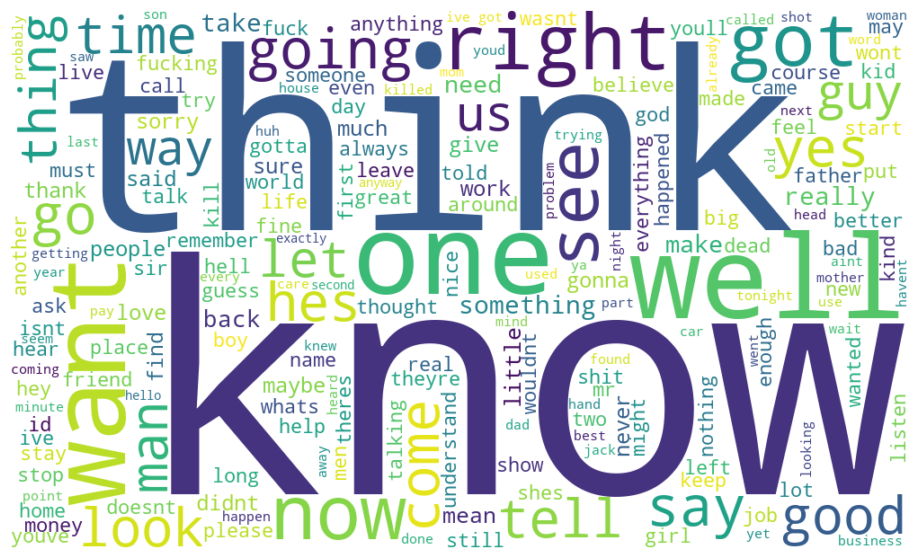

In [21]:
combined_text = " ".join(df["cleaned_text"].dropna())

wordcloud = WordCloud(
    width=1000,
    height=600,
    background_color="white",
    max_words=200
).generate(combined_text)

plt.figure(figsize=(12, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Used to visualize top words

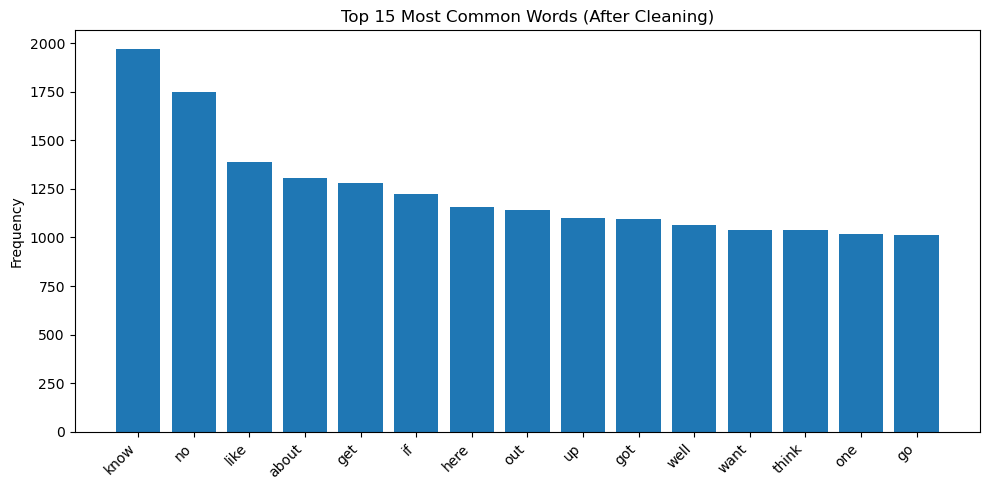

In [23]:
words = [w for w, c in common_words]
counts = [c for w, c in common_words]

plt.figure(figsize=(10, 5))
plt.bar(words, counts)
plt.xticks(rotation=45, ha="right")
plt.title("Top 15 Most Common Words (After Cleaning)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Reflection

In [27]:
# 1) What were the most common words in your text?
# After cleaning, my most common words were:
# 'know', 'no', 'like', 'about', 'get', 'if', 'here', 'out', 'up', 'got',
# 'well', 'want', 'think', 'one', and 'go'.
# These are mostly conversational words, which makes sense since movie lines
# are mostly a dialogue between characters.

# 2) Did anything surprise you about the results?
# There was something that did surprise me, was how often words like "know", "like", and "well"
# showed up. Even after removing stopwords, a lot of casual filler words are still
# very common. It made me see how repetitive normal speech can be in movies. I am a big movie guy!

# 3) Do you think this text would be easy or hard for a computer to understand? Why?
# I think it would be pretty hard for a computer to fully understand this text.
# Even though the words are simple, as movie dialogue depends a lot on the context,
# tone, sarcasm, and relationships between the characters. A computer can count
# words easily, but understanding what people actually mean is much harder in practice.